In [1]:
import pandas as pd
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit import DataStructs
import rdkit
import numpy as np

import numpy

In [2]:
df = pd.read_csv('ddi_w_smiles.csv')
df

drug_a  drug_a_chembl  \
0              Naltrexone    CHEMBL19019   
1                Abacavir     CHEMBL1380   
2      Aluminum hydroxide  CHEMBL1200706   
3              Aprepitant     CHEMBL1471   
4         Calcium acetate  CHEMBL1200800   
...                   ...            ...   
88927            Tolmetin     CHEMBL1020   
88928            Tolmetin     CHEMBL1020   
88929     Trifluoperazine      CHEMBL422   
88930     Trihexyphenidyl     CHEMBL1490   
88931     Trihexyphenidyl     CHEMBL1490   

                                       drug_a_can_smiles  \
0      O=C1CC[C@@]2(O)[C@H]3Cc4ccc(O)c5c4[C@@]2(CCN3C...   
1          Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1   
2                               [Al+3].[OH-].[OH-].[OH-]   
3      C[C@@H](O[C@H]1OCCN(Cc2n[nH]c(=O)[nH]2)[C@H]1c...   
4                           CC(=O)[O-].CC(=O)[O-].[Ca+2]   
...                                                  ...   
88927                  Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1   
88928                  Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1   
88929       CN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1   
88930                   OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1   
88931                   OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1   

                           drug_b  drug_b_chembl  \
0                        Abacavir     CHEMBL1380   
1                        Orlistat   CHEMBL175247   
2                    Dolutegravir  CHEMBL1229211   
3                    Dolutegravir  CHEMBL1229211   
4                    Dolutegravir  CHEMBL1229211   
...                           ...            ...   
88927                  Iodipamide  CHEMBL1165268   
88928                   Iodixanol  CHEMBL1200507   
88929  Physostigmine (ophthalmic)       CHEMBL94   
88930                 Edrophonium     CHEMBL1104   
88931  Physostigmine (ophthalmic)       CHEMBL94   

                                       drug_b_can_smiles interaction_level  
0          Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1          Moderate  
1      CCCCCCCCCCC[C@@H](C[C@@H]1OC(=O)[C@H]1CCCCCC)O...          Moderate  
2      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...             Major  
3      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...             Minor  
4      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...             Major  
...                                                  ...               ...  
88927  O=C(CCCCC(=O)Nc1c(I)cc(I)c(C(=O)O)c1I)Nc1c(I)c...             Major  
88928  CC(=O)N(CC(O)CN(C(C)=O)c1c(I)c(C(=O)NCC(O)CO)c...             Major  
88929        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C          Moderate  
88930                            CC[N+](C)(C)c1cccc(O)c1          Moderate  
88931        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C          Moderate  

[88932 rows x 7 columns]

drug_a  drug_a_chembl  \
0              Naltrexone    CHEMBL19019   
1                Abacavir     CHEMBL1380   
2      Aluminum hydroxide  CHEMBL1200706   
3              Aprepitant     CHEMBL1471   
4         Calcium acetate  CHEMBL1200800   
...                   ...            ...   
88927            Tolmetin     CHEMBL1020   
88928            Tolmetin     CHEMBL1020   
88929     Trifluoperazine      CHEMBL422   
88930     Trihexyphenidyl     CHEMBL1490   
88931     Trihexyphenidyl     CHEMBL1490   

                                       drug_a_can_smiles  \
0      O=C1CC[C@@]2(O)[C@H]3Cc4ccc(O)c5c4[C@@]2(CCN3C...   
1          Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1   
2                               [Al+3].[OH-].[OH-].[OH-]   
3      C[C@@H](O[C@H]1OCCN(Cc2n[nH]c(=O)[nH]2)[C@H]1c...   
4                           CC(=O)[O-].CC(=O)[O-].[Ca+2]   
...                                                  ...   
88927                  Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1   
88928                  Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1   
88929       CN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1   
88930                   OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1   
88931                   OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1   

                           drug_b  drug_b_chembl  \
0                        Abacavir     CHEMBL1380   
1                        Orlistat   CHEMBL175247   
2                    Dolutegravir  CHEMBL1229211   
3                    Dolutegravir  CHEMBL1229211   
4                    Dolutegravir  CHEMBL1229211   
...                           ...            ...   
88927                  Iodipamide  CHEMBL1165268   
88928                   Iodixanol  CHEMBL1200507   
88929  Physostigmine (ophthalmic)       CHEMBL94   
88930                 Edrophonium     CHEMBL1104   
88931  Physostigmine (ophthalmic)       CHEMBL94   

                                       drug_b_can_smiles interaction_level  \
0          Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1          Moderate   
1      CCCCCCCCCCC[C@@H](C[C@@H]1OC(=O)[C@H]1CCCCCC)O...          Moderate   
2      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...             Major   
3      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...             Minor   
4      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...             Major   
...                                                  ...               ...   
88927  O=C(CCCCC(=O)Nc1c(I)cc(I)c(C(=O)O)c1I)Nc1c(I)c...             Major   
88928  CC(=O)N(CC(O)CN(C(C)=O)c1c(I)c(C(=O)NCC(O)CO)c...             Major   
88929        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C          Moderate   
88930                            CC[N+](C)(C)c1cccc(O)c1          Moderate   
88931        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C          Moderate   

                                        drug_a_mol_struc  \
0      <img data-content="rdkit/molecule" src="data:i...   
1      <img data-content="rdkit/molecule" src="data:i...   
2      <img data-content="rdkit/molecule" src="data:i...   
3      <img data-content="rdkit/molecule" src="data:i...   
4      <img data-content="rdkit/molecule" src="data:i...   
...                                                  ...   
88927  <img data-content="rdkit/molecule" src="data:i...   
88928  <img data-content="rdkit/molecule" src="data:i...   
88929  <img data-content="rdkit/molecule" src="data:i...   
88930  <img data-content="rdkit/molecule" src="data:i...   
88931  <img data-content="rdkit/molecule" src="data:i...   

                                        drug_b_mol_struc  
0      <img data-content="rdkit/molecule" src="data:i...  
1      <img data-content="rdkit/molecule" src="data:i...  
2      <img data-content="rdkit/molecule" src="data:i...  
3      <img data-content="rdkit/molecule" src="data:i...  
4      <img data-content="rdkit/molecule" src="data:i...  
...                                                  ...  
88927  <img data-content="rdkit/molecule" src="data:i...  
88928  <img da
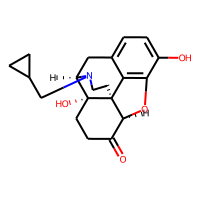
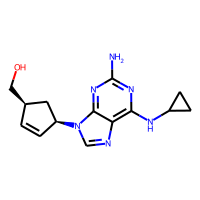
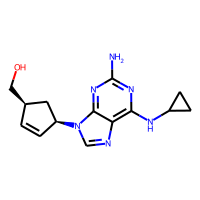
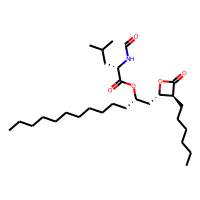
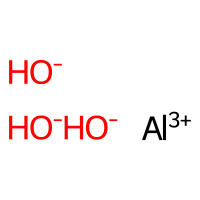
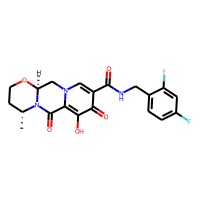
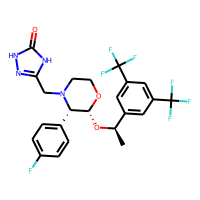
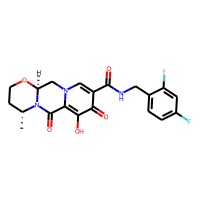
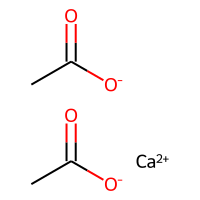
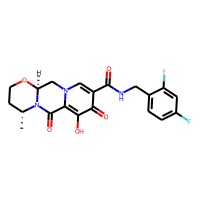
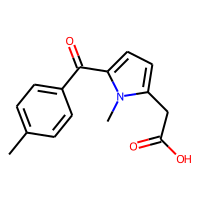
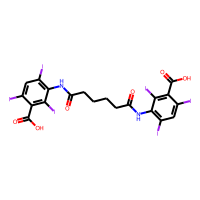
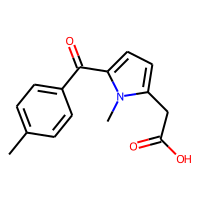
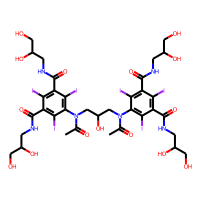
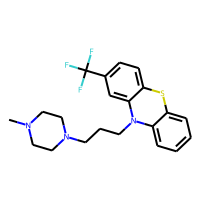
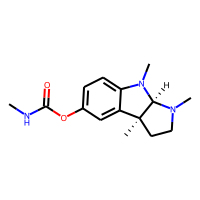
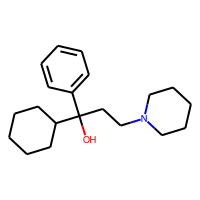
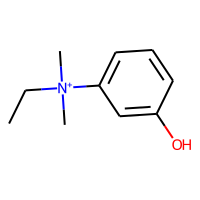
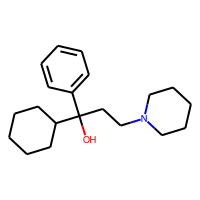
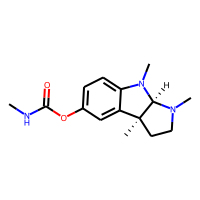

In [3]:
PandasTools.AddMoleculeColumnToFrame(df,'drug_a_can_smiles','drug_a_mol_struc',includeFingerprints=True)
PandasTools.AddMoleculeColumnToFrame(df,'drug_b_can_smiles','drug_b_mol_struc',includeFingerprints=True)
df

drug_a  drug_a_chembl  \
0              Naltrexone    CHEMBL19019   
1                Abacavir     CHEMBL1380   
2      Aluminum hydroxide  CHEMBL1200706   
3              Aprepitant     CHEMBL1471   
4         Calcium acetate  CHEMBL1200800   
...                   ...            ...   
88927            Tolmetin     CHEMBL1020   
88928            Tolmetin     CHEMBL1020   
88929     Trifluoperazine      CHEMBL422   
88930     Trihexyphenidyl     CHEMBL1490   
88931     Trihexyphenidyl     CHEMBL1490   

                                       drug_a_can_smiles  \
0      O=C1CC[C@@]2(O)[C@H]3Cc4ccc(O)c5c4[C@@]2(CCN3C...   
1          Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1   
2                               [Al+3].[OH-].[OH-].[OH-]   
3      C[C@@H](O[C@H]1OCCN(Cc2n[nH]c(=O)[nH]2)[C@H]1c...   
4                           CC(=O)[O-].CC(=O)[O-].[Ca+2]   
...                                                  ...   
88927                  Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1   
88928                  Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1   
88929       CN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1   
88930                   OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1   
88931                   OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1   

                           drug_b  drug_b_chembl  \
0                        Abacavir     CHEMBL1380   
1                        Orlistat   CHEMBL175247   
2                    Dolutegravir  CHEMBL1229211   
3                    Dolutegravir  CHEMBL1229211   
4                    Dolutegravir  CHEMBL1229211   
...                           ...            ...   
88927                  Iodipamide  CHEMBL1165268   
88928                   Iodixanol  CHEMBL1200507   
88929  Physostigmine (ophthalmic)       CHEMBL94   
88930                 Edrophonium     CHEMBL1104   
88931  Physostigmine (ophthalmic)       CHEMBL94   

                                       drug_b_can_smiles interaction_level  \
0          Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1          Moderate   
1      CCCCCCCCCCC[C@@H](C[C@@H]1OC(=O)[C@H]1CCCCCC)O...          Moderate   
2      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...             Major   
3      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...             Minor   
4      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...             Major   
...                                                  ...               ...   
88927  O=C(CCCCC(=O)Nc1c(I)cc(I)c(C(=O)O)c1I)Nc1c(I)c...             Major   
88928  CC(=O)N(CC(O)CN(C(C)=O)c1c(I)c(C(=O)NCC(O)CO)c...             Major   
88929        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C          Moderate   
88930                            CC[N+](C)(C)c1cccc(O)c1          Moderate   
88931        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C          Moderate   

                                        drug_a_mol_struc  \
0      <img data-content="rdkit/molecule" src="data:i...   
1      <img data-content="rdkit/molecule" src="data:i...   
2      <img data-content="rdkit/molecule" src="data:i...   
3      <img data-content="rdkit/molecule" src="data:i...   
4      <img data-content="rdkit/molecule" src="data:i...   
...                                                  ...   
88927  <img data-content="rdkit/molecule" src="data:i...   
88928  <img data-content="rdkit/molecule" src="data:i...   
88929  <img data-content="rdkit/molecule" src="data:i...   
88930  <img data-content="rdkit/molecule" src="data:i...   
88931  <img data-content="rdkit/molecule" src="data:i...   

                                        drug_b_mol_struc  \
0      <img data-content="rdkit/molecule" src="data:i...   
1      <img data-content="rdkit/molecule" src="data:i...   
2      <img data-content="rdkit/molecule" src="data:i...   
3      <img data-content="rdkit/molecule" src="data:i...   
4      <img data-content="rdkit/molecule" src="data:i...   
...                                                  ...   
88927  <img data-content="rdkit/molecule" src="data:i...   
88928 
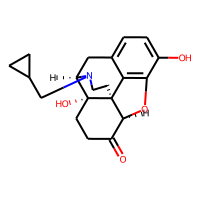
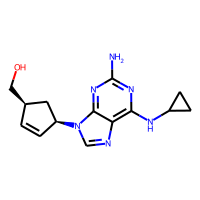
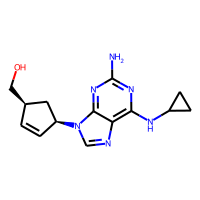
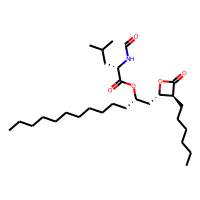
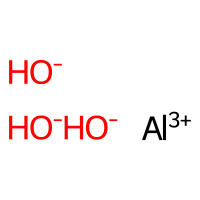
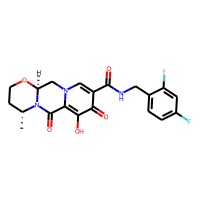
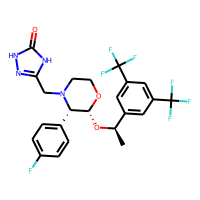
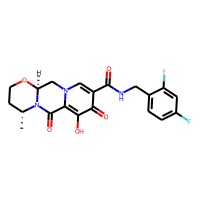
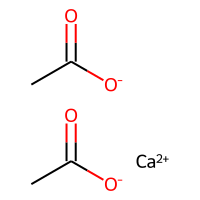
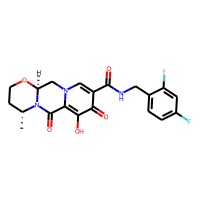
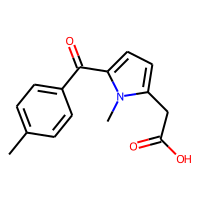
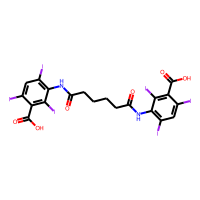
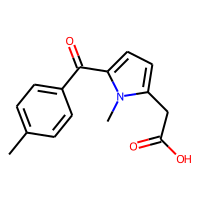
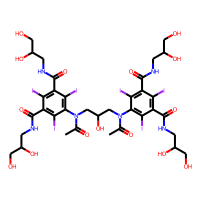
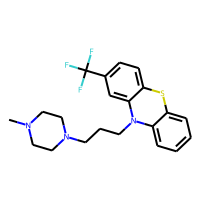
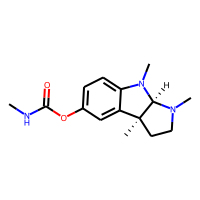
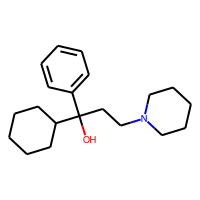
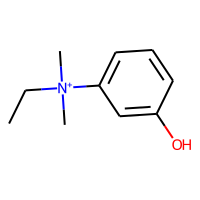
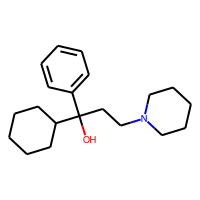
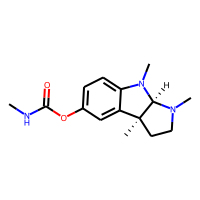

In [4]:
fplist_a = []
for mol in df['drug_a_mol_struc']:
    fp = Chem.GetMorganFingerprintAsBitVect( mol,2 )
    fp_arr = np.zeros((0,), dtype=int)
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fplist_a.append(fp_arr)
df['drug_a_fp']=fplist_a

fplist_b = [] #fplist
for mol in df['drug_b_mol_struc']:
    fp = Chem.GetMorganFingerprintAsBitVect( mol,2 )
    fp_arr = np.zeros((0,), dtype=int)
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fplist_b.append(fp_arr)
df['drug_b_fp']=fplist_b

df

drug_a                                   drug_a_mol_struc  \
0              Naltrexone  <img data-content="rdkit/molecule" src="data:i...   
1                Abacavir  <img data-content="rdkit/molecule" src="data:i...   
2      Aluminum hydroxide  <img data-content="rdkit/molecule" src="data:i...   
3              Aprepitant  <img data-content="rdkit/molecule" src="data:i...   
4         Calcium acetate  <img data-content="rdkit/molecule" src="data:i...   
...                   ...                                                ...   
88927            Tolmetin  <img data-content="rdkit/molecule" src="data:i...   
88928            Tolmetin  <img data-content="rdkit/molecule" src="data:i...   
88929     Trifluoperazine  <img data-content="rdkit/molecule" src="data:i...   
88930     Trihexyphenidyl  <img data-content="rdkit/molecule" src="data:i...   
88931     Trihexyphenidyl  <img data-content="rdkit/molecule" src="data:i...   

                                       drug_a_can_smiles  \
0      O=C1CC[C@@]2(O)[C@H]3Cc4ccc(O)c5c4[C@@]2(CCN3C...   
1          Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1   
2                               [Al+3].[OH-].[OH-].[OH-]   
3      C[C@@H](O[C@H]1OCCN(Cc2n[nH]c(=O)[nH]2)[C@H]1c...   
4                           CC(=O)[O-].CC(=O)[O-].[Ca+2]   
...                                                  ...   
88927                  Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1   
88928                  Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1   
88929       CN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1   
88930                   OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1   
88931                   OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1   

                                               drug_a_fp  \
0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3      [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                  ...   
88927  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   
88928  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   
88929  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
88930  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
88931  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                           drug_b  \
0                        Abacavir   
1                        Orlistat   
2                    Dolutegravir   
3                    Dolutegravir   
4                    Dolutegravir   
...                           ...   
88927                  Iodipamide   
88928                   Iodixanol   
88929  Physostigmine (ophthalmic)   
88930                 Edrophonium   
88931  Physostigmine (ophthalmic)   

                                        drug_b_mol_struc  \
0      <img data-content="rdkit/molecule" src="data:i...   
1      <img data-content="rdkit/molecule" src="data:i...   
2      <img data-content="rdkit/molecule" src="data:i...   
3      <img data-content="rdkit/molecule" src="data:i...   
4      <img data-content="rdkit/molecule" src="data:i...   
...                                                  ...   
88927  <img data-content="rdkit/molecule" src="data:i...   
88928  <img data-content="rdkit/molecule" src="data:i...   
88929  <img data-content="rdkit/molecule" src="data:i...   
88930  <img data-content="rdkit/molecule" src="data:i...   
88931  <img data-content="rdkit/molecule" src="data:i...   

                                       drug_b_can_smiles  \
0          Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1   
1      CCCCCCCCCCC[C@@H](C[C@@H]1OC(=O)[C@H]1CCCCCC)O...   
2      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...   
3      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...   
4      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...   
...                                                  ...   
88927  O=C(CCCCC(=O)Nc1c(I)cc(
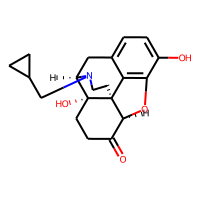
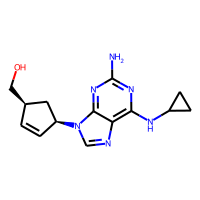
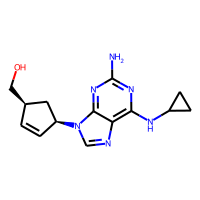
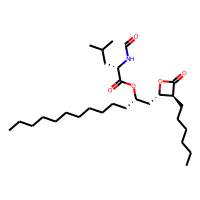
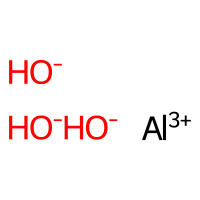
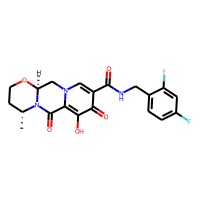
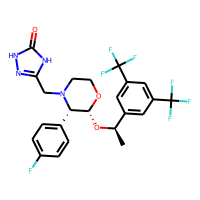
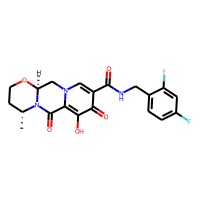
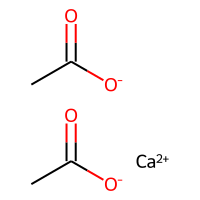
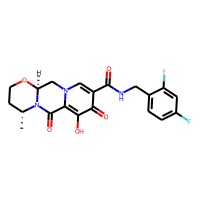
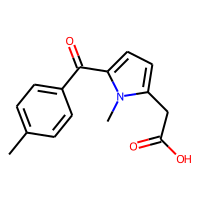
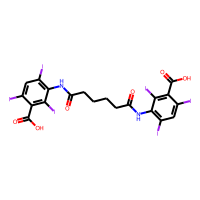
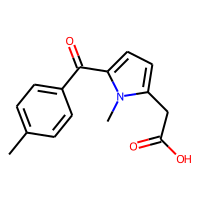
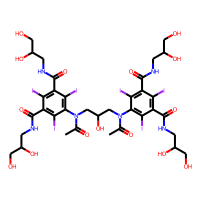
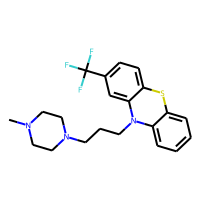
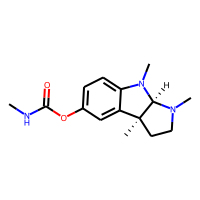
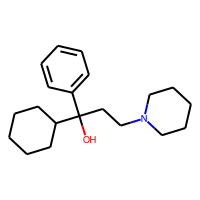
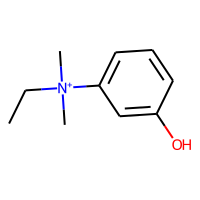
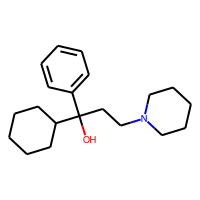
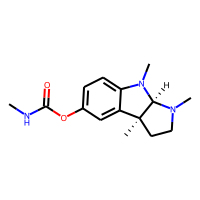

In [5]:
df2 = df[['drug_a',
           'drug_a_mol_struc',
           'drug_a_can_smiles',
           'drug_a_fp',
           'drug_b',
           'drug_b_mol_struc',
           'drug_b_can_smiles',
           'drug_b_fp',
           'interaction_level']]

df2

In [6]:
fp_list = []
for i in range(88932):
    drug_a_fp_arr = df.at[i, 'drug_a_fp']
    drug_b_fp_arr = df.at[i, 'drug_b_fp']
    
    # rules for combining two fingerprints into 1
    combined_fp_arr = np.empty(2048, dtype=int)
    for j in range(2048):
        if (drug_a_fp_arr[j] == 0 & drug_b_fp_arr[j] == 0) | (drug_a_fp_arr[j] == 1 & drug_b_fp_arr[j] == 1):
            combined_fp_arr[j] = 1
        else:
            combined_fp_arr[j] = 0
    fp_list.append(combined_fp_arr)

C:\Users\dell\anaconda3\envs\biomolecule\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


drug_a                                   drug_a_mol_struc  \
0              Naltrexone  <img data-content="rdkit/molecule" src="data:i...   
1                Abacavir  <img data-content="rdkit/molecule" src="data:i...   
2      Aluminum hydroxide  <img data-content="rdkit/molecule" src="data:i...   
3              Aprepitant  <img data-content="rdkit/molecule" src="data:i...   
4         Calcium acetate  <img data-content="rdkit/molecule" src="data:i...   
...                   ...                                                ...   
88927            Tolmetin  <img data-content="rdkit/molecule" src="data:i...   
88928            Tolmetin  <img data-content="rdkit/molecule" src="data:i...   
88929     Trifluoperazine  <img data-content="rdkit/molecule" src="data:i...   
88930     Trihexyphenidyl  <img data-content="rdkit/molecule" src="data:i...   
88931     Trihexyphenidyl  <img data-content="rdkit/molecule" src="data:i...   

                                       drug_a_can_smiles  \
0      O=C1CC[C@@]2(O)[C@H]3Cc4ccc(O)c5c4[C@@]2(CCN3C...   
1          Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1   
2                               [Al+3].[OH-].[OH-].[OH-]   
3      C[C@@H](O[C@H]1OCCN(Cc2n[nH]c(=O)[nH]2)[C@H]1c...   
4                           CC(=O)[O-].CC(=O)[O-].[Ca+2]   
...                                                  ...   
88927                  Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1   
88928                  Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1   
88929       CN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1   
88930                   OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1   
88931                   OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1   

                                               drug_a_fp  \
0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3      [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                  ...   
88927  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   
88928  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   
88929  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
88930  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
88931  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                           drug_b  \
0                        Abacavir   
1                        Orlistat   
2                    Dolutegravir   
3                    Dolutegravir   
4                    Dolutegravir   
...                           ...   
88927                  Iodipamide   
88928                   Iodixanol   
88929  Physostigmine (ophthalmic)   
88930                 Edrophonium   
88931  Physostigmine (ophthalmic)   

                                        drug_b_mol_struc  \
0      <img data-content="rdkit/molecule" src="data:i...   
1      <img data-content="rdkit/molecule" src="data:i...   
2      <img data-content="rdkit/molecule" src="data:i...   
3      <img data-content="rdkit/molecule" src="data:i...   
4      <img data-content="rdkit/molecule" src="data:i...   
...                                                  ...   
88927  <img data-content="rdkit/molecule" src="data:i...   
88928  <img data-content="rdkit/molecule" src="data:i...   
88929  <img data-content="rdkit/molecule" src="data:i...   
88930  <img data-content="rdkit/molecule" src="data:i...   
88931  <img data-content="rdkit/molecule" src="data:i...   

                                       drug_b_can_smiles  \
0          Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1   
1      CCCCCCCCCCC[C@@H](C[C@@H]1OC(=O)[C@H]1CCCCCC)O...   
2      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...   
3      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...   
4      C[C@@H]1CCO[C@H]2Cn3cc(C(=O)NCc4ccc(F)cc4F)c(=...   
...                                                  ...   
88927  O=C(CCCCC(=O)Nc1c(I)cc(
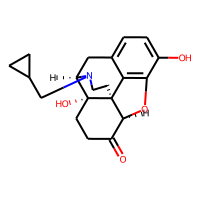
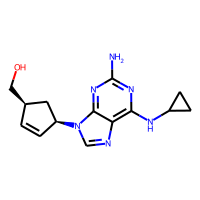
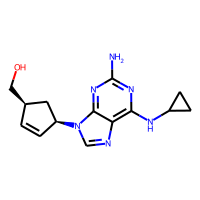
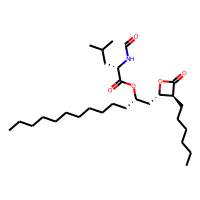
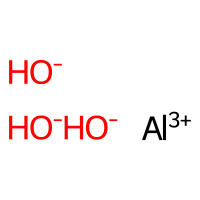
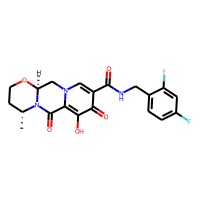
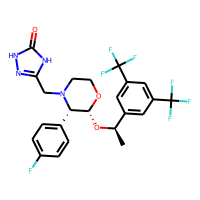
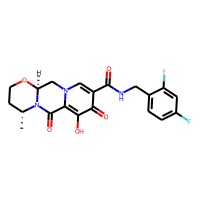
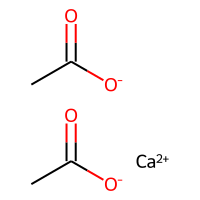
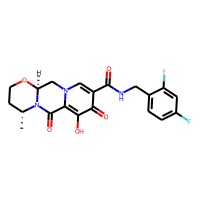
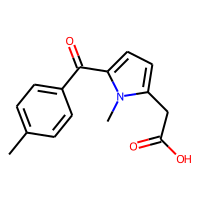
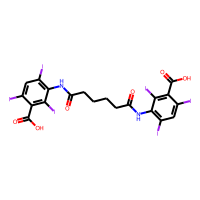
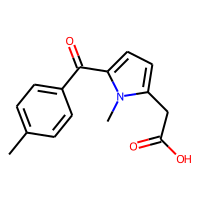
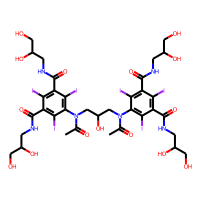
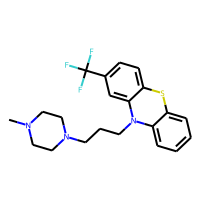
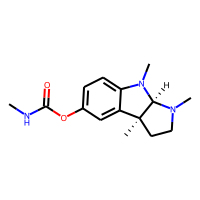
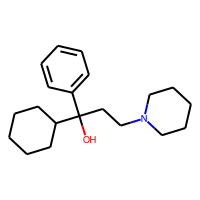
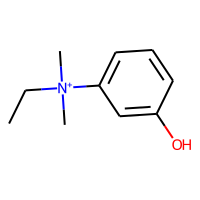
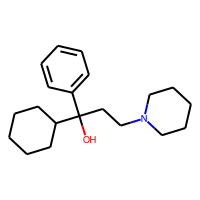
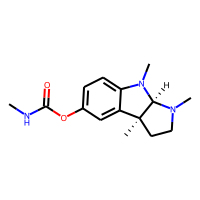

In [7]:
df2['combined_fp']=fp_list
df2

# X and Y Generation

In [42]:
X_df = df2.sample(frac=0.01).reset_index(drop=True)
print(X_df['interaction_level'].value_counts())

Moderate    666
Major       173
Minor        50
Name: interaction_level, dtype: int64


In [44]:
X = [X_df.at[0, 'combined_fp']]
for i in range(1, 889):
    curr_X = [X_df.at[i, 'combined_fp']]
    X = np.concatenate((X, curr_X))
X.shape

(889, 2048)

drug_a  \
0                Argatroban   
1               Cabazitaxel   
2                 Mitomycin   
3               Desogestrel   
4             Grepafloxacin   
..                      ...   
884              Teniposide   
885              Carmustine   
886               Celecoxib   
887              Doxylamine   
888  Betaxolol (ophthalmic)   

                                      drug_a_mol_struc  \
0    <img data-content="rdkit/molecule" src="data:i...   
1    <img data-content="rdkit/molecule" src="data:i...   
2    <img data-content="rdkit/molecule" src="data:i...   
3    <img data-content="rdkit/molecule" src="data:i...   
4    <img data-content="rdkit/molecule" src="data:i...   
..                                                 ...   
884  <img data-content="rdkit/molecule" src="data:i...   
885  <img data-content="rdkit/molecule" src="data:i...   
886  <img data-content="rdkit/molecule" src="data:i...   
887  <img data-content="rdkit/molecule" src="data:i...   
888  <img data-content="rdkit/molecule" src="data:i...   

                                     drug_a_can_smiles  \
0    CC1CNc2c(cccc2S(=O)(=O)N[C@@H](CCCNC(=N)N)C(=O...   
1    CO[C@H]1C[C@H]2OC[C@@]2(OC(C)=O)[C@H]2[C@H](OC...   
2    CO[C@@]12[C@H](COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=...   
3    C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H...   
4     Cc1c(F)c(N2CCNC(C)C2)cc2c1c(=O)c(C(=O)O)cn2C1CC1   
..                                                 ...   
884  COc1cc([C@@H]2c3cc4c(cc3[C@@H](O[C@@H]3O[C@@H]...   
885                               O=NN(CCCl)C(=O)NCCCl   
886  Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...   
887                     CN(C)CCOC(C)(c1ccccc1)c1ccccn1   
888                   CC(C)NCC(O)COc1ccc(CCOCC2CC2)cc1   

                                             drug_a_fp           drug_b  \
0    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...         Edoxaban   
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     Benznidazole   
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      Ganciclovir   
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       Dabrafenib   
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        Glyburide   
..                                                 ...              ...   
884  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...       Zidovudine   
885  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      Leflunomide   
886  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     Streptomycin   
887  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...  Triflupromazine   
888  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...       Olodaterol   

                                      drug_b_mol_struc  \
0    <img data-content="rdkit/molecule" src="data:i...   
1    <img data-content="rdkit/molecule" src="data:i...   
2    <img data-content="rdkit/molecule" src="data:i...   
3    <img data-content="rdkit/molecule" src="data:i...   
4    <img data-content="rdkit/molecule" src="data:i...   
..                                                 ...   
884  <img data-content="rdkit/molecule" src="data:i...   
885  <img data-content="rdkit/molecule" src="data:i...   
886  <img data-content="rdkit/molecule" src="data:i...   
887  <img data-content="rdkit/molecule" src="data:i...   
888  <img data-content="rdkit/molecule" src="data:i...   

                                     drug_b_can_smiles  \
0    CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...   
1                  O=C(Cn1ccnc1[N+](=O)[O-])NCc1ccccc1   
2                         Nc1nc(O)c2ncn(COC(CO)CO)c2n1   
3    CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...   
4    COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...   
..                                                 ...   
884  Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...   
885                   Cc1oncc1C(=O)Nc1ccc(C(F)(F)F)cc1   
886  CN[C@@H]1[C@H](O[C@H]2[C@H](O[C@@H]3[C@@H](N=C...   
887             CN(C)CCCN1c2ccccc2Sc2ccc(C(F)(F)F)cc21   
888  COc1ccc(CC(C)
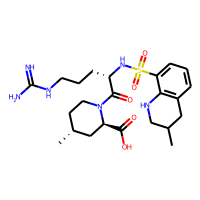
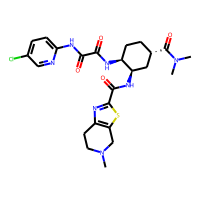
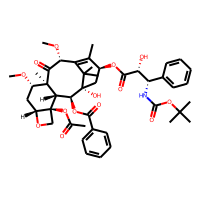
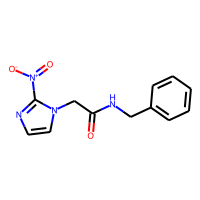
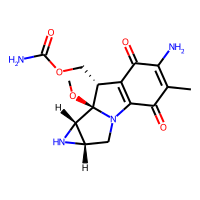
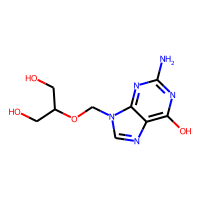
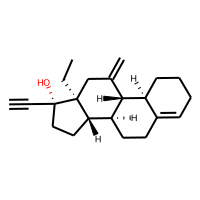
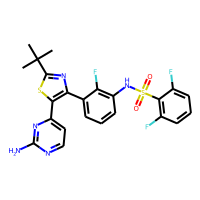
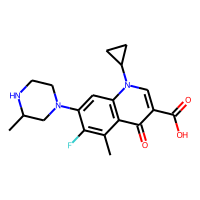
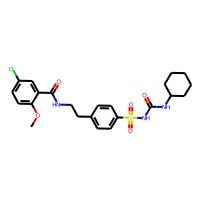
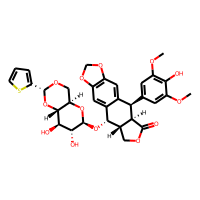
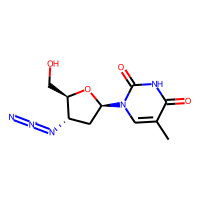
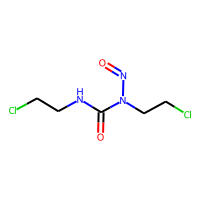
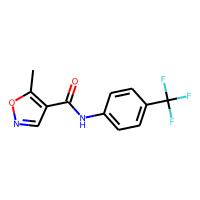
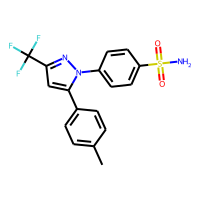
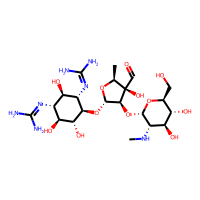
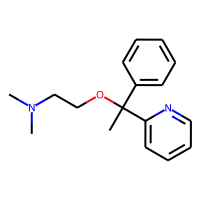
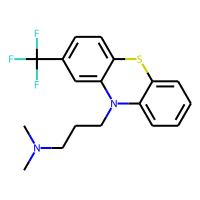
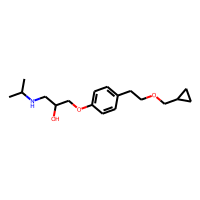
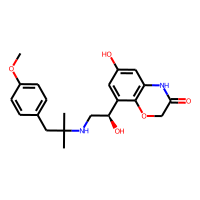

In [45]:
X_df

In [47]:
def interaction_level_convert(level):
    if level == 'Minor':
        return 0
    if level == 'Moderate':
        return 1
    if level == 'Major':
        return 2
    
Y = np.array([interaction_level_convert(X_df.at[0, 'interaction_level'])])
for i in range(1, 889):
    curr_Y = interaction_level_convert(X_df.at[i, 'interaction_level'])
    Y = np.append(Y, curr_Y)
Y.shape

(889,)

# Machine Learning

In [48]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.feature_selection import VarianceThreshold

In [49]:
selection = VarianceThreshold(threshold=(0.05))
X_final = selection.fit_transform(X)
X_final.shape

(889, 129)

In [38]:
# Perform data splitting using 80/20 rat
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.2, random_state=42)

In [39]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:02<00:00,  1.49s/it]


In [40]:
train

Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.06       0.12  0.45        0.14
HistGradientBoostingRegressor                0.06       0.12  0.45        2.74
RandomForestRegressor                        0.03       0.10  0.46        4.97
SVR                                          0.02       0.09  0.46        2.85
GradientBoostingRegressor                    0.01       0.08  0.46        1.35
NuSVR                                       -0.01       0.07  0.47        4.70
XGBRegressor                                -0.01       0.06  0.47        0.41
LarsCV                                      -0.04       0.04  0.47        0.23
BayesianRidge                               -0.04       0.04  0.47        0.13
PoissonRegressor                            -0.04       0.04  0.47        0.05
LassoLarsIC                                 -0.04       0.04  0.47        0.07
ElasticNetCV                                -0.04       0.04  0.47        0.30
LassoCV                                     -0.04       0.04  0.47        0.30
LassoLarsCV                                 -0.04       0.03  0.47        0.25
TweedieRegressor                            -0.04       0.03  0.47        0.04
GeneralizedLinearRegressor                  -0.04       0.03  0.47        0.05
Lars                                        -0.05       0.03  0.47        0.06
RidgeCV                                     -0.05       0.03  0.47        0.13
Ridge                                       -0.05       0.03  0.47        0.04
TransformedTargetRegressor                  -0.05       0.03  0.47        0.09
LinearRegression                            -0.05       0.03  0.47        0.09
AdaBoostRegressor                           -0.05       0.02  0.48        0.38
OrthogonalMatchingPursuit                   -0.06       0.02  0.48        0.05
OrthogonalMatchingPursuitCV                 -0.06       0.02  0.48        0.13
BaggingRegressor                            -0.06       0.02  0.48        0.59
SGDRegressor                                -0.07       0.00  0.48        0.05
Lasso                                       -0.08      -0.00  0.48        0.04
DummyRegressor                              -0.08      -0.00  0.48        0.03
ElasticNet                                  -0.08      -0.00  0.48        0.04
LassoLars                                   -0.08      -0.00  0.48        0.04
KNeighborsRegressor                         -0.10      -0.02  0.49        1.02
HuberRegressor                              -0.18      -0.09  0.50        0.67
LinearSVR                                   -0.18      -0.09  0.50        0.63
ExtraTreesRegressor                         -0.67      -0.55  0.60        7.21
MLPRegressor                                -0.76      -0.64  0.62       21.18
ExtraTreeRegressor                          -0.90      -0.76  0.64        0.11
DecisionTreeRegressor                       -0.90      -0.76  0.64        0.12
PassiveAggressiveRegressor                  -1.17      -1.01  0.68        0.05
GaussianProcessRegressor                    -5.52      -5.05  1.19        7.23
KernelRidge                                 -6.19      -5.68  1.25        2.33

In [41]:
test

Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.06       0.12  0.45        0.14
HistGradientBoostingRegressor                0.06       0.12  0.45        2.74
RandomForestRegressor                        0.03       0.10  0.46        4.97
SVR                                          0.02       0.09  0.46        2.85
GradientBoostingRegressor                    0.01       0.08  0.46        1.35
NuSVR                                       -0.01       0.07  0.47        4.70
XGBRegressor                                -0.01       0.06  0.47        0.41
LarsCV                                      -0.04       0.04  0.47        0.23
BayesianRidge                               -0.04       0.04  0.47        0.13
PoissonRegressor                            -0.04       0.04  0.47        0.05
LassoLarsIC                                 -0.04       0.04  0.47        0.07
ElasticNetCV                                -0.04       0.04  0.47        0.30
LassoCV                                     -0.04       0.04  0.47        0.30
LassoLarsCV                                 -0.04       0.03  0.47        0.25
TweedieRegressor                            -0.04       0.03  0.47        0.04
GeneralizedLinearRegressor                  -0.04       0.03  0.47        0.05
Lars                                        -0.05       0.03  0.47        0.06
RidgeCV                                     -0.05       0.03  0.47        0.13
Ridge                                       -0.05       0.03  0.47        0.04
TransformedTargetRegressor                  -0.05       0.03  0.47        0.09
LinearRegression                            -0.05       0.03  0.47        0.09
AdaBoostRegressor                           -0.05       0.02  0.48        0.38
OrthogonalMatchingPursuit                   -0.06       0.02  0.48        0.05
OrthogonalMatchingPursuitCV                 -0.06       0.02  0.48        0.13
BaggingRegressor                            -0.06       0.02  0.48        0.59
SGDRegressor                                -0.07       0.00  0.48        0.05
Lasso                                       -0.08      -0.00  0.48        0.04
DummyRegressor                              -0.08      -0.00  0.48        0.03
ElasticNet                                  -0.08      -0.00  0.48        0.04
LassoLars                                   -0.08      -0.00  0.48        0.04
KNeighborsRegressor                         -0.10      -0.02  0.49        1.02
HuberRegressor                              -0.18      -0.09  0.50        0.67
LinearSVR                                   -0.18      -0.09  0.50        0.63
ExtraTreesRegressor                         -0.67      -0.55  0.60        7.21
MLPRegressor                                -0.76      -0.64  0.62       21.18
ExtraTreeRegressor                          -0.90      -0.76  0.64        0.11
DecisionTreeRegressor                       -0.90      -0.76  0.64        0.12
PassiveAggressiveRegressor                  -1.17      -1.01  0.68        0.05
GaussianProcessRegressor                    -5.52      -5.05  1.19        7.23
KernelRidge                                 -6.19      -5.68  1.25        2.33

# NuSVR

In [71]:
from sklearn.svm import NuSVR
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn import svm

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [73]:
clf = svm.SVC()

In [74]:
# Train the model and provide R-squared values
clf.fit(X_train, Y_train)

score = clf.score(X_test, Y_test)
print("R-squared:", score)

R-squared: 0.7247191011235955


In [75]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# ML but no variance selection

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [183]:
# Define the model
nsvr = NuSVR()
print(nsvr)

NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

(14228,)